In [1]:
from ConvLayer import *
from FullyConnected import *
from MaxPoolLayer import *
from Relu import *
from SoftmaxLayer import *
from Flatten import *
import data as data
import os 
from cnn import *
import numpy as np
np.random.seed(6666)  

In [2]:
t_data=[]
t_label=[]
te_data=[]
te_label=[]
train_data=[]
train_label=[]
test_data=[]
test_label=[]


In [3]:
def loadData():
    os.chdir("flower_photos")
    for root, dirs, files in os.walk(".", topdown = False):
        for name in dirs:
            final_training, final_test_data, test_label, training_label= data.process(os.path.join(root, name)[2:])
            t_data.extend(final_training)
            t_label.extend(training_label)
            te_data.extend(final_test_data)
            te_label.extend(test_label)
            train_label=np.array(t_label)
            train_data=np.array(t_data)
            test_data= np.array(te_data)
            test_label= np.array(te_label)
            
    return train_data, train_label,test_data,test_label

In [4]:
train_data, train_label,test_data,test_label= loadData()

In [5]:
print ('Training data shape: ', train_data.shape)
print ('Training labels shape: ', train_label.shape)
print ('Test data shape: ', test_data.shape)
print ('Test labels shape: ', test_label.shape)

Training data shape:  (3170, 32, 32, 3)
Training labels shape:  (3170,)
Test data shape:  (500, 32, 32, 3)
Test labels shape:  (500,)


In [6]:
#total training photos = 3170, so 90% of them is 2853
s = np.random.permutation(train_data.shape[0])           # randomly shuffle the images and their corresponding labels
train_data   = train_data[s]
train_label = train_label[s]

Xtr = train_data[:2853]                   # 90 % of the data for training
Ytr = train_label[:2853]
Xval = train_data[2853:]                  # 10 % for validation
Yval = train_label[2853:]



In [7]:
Xtr = Xtr- np.expand_dims(np.mean(Xtr,axis = 0),0)
Xval = Xval- np.expand_dims(np.mean(Xval,axis = 0),0)
test_data  = test_data- np.expand_dims(np.mean(test_data,axis = 0),0)

Xtr  /= np.std(Xtr, axis=0)     
Xval  /= np.std(Xval, axis=0)
test_data  /= np.std(test_data, axis=0)


In [8]:
print(Ytr)
i =0
print("===============================================")
with np.nditer(Ytr, op_flags=['readwrite']) as it:
        for x in it:
            if (x == 'dandelion'):
                Ytr[i] = 0
            elif (x == 'sunflowers'):
                Ytr[i] = 1
            elif (x == 'tulips'):
                Ytr[i]= 2
            elif (x == 'roses'):
                Ytr[i] = 3
            else: 
                Ytr[i] = 4
            i+=1
print(Ytr)

['daisy' 'dandelion' 'sunflowers' ... 'roses' 'roses' 'sunflowers']
['4' '0' '1' ... '3' '3' '1']


In [9]:
i =0
with np.nditer(Yval, op_flags=['readwrite']) as it:
        for x in it:
            if (x == 'dandelion'):
                Yval[i] = 0
            elif (x == 'sunflowers'):
                Yval[i] = 1
            elif (x == 'tulips'):
                Yval[i]= 2
            elif (x == 'roses'):
                Yval[i] = 3
            else: 
                Yval[i] = 4
            i+=1

In [10]:
i =0
with np.nditer(test_label, op_flags=['readwrite']) as it:
        for x in it:
            if (x == 'dandelion'):
                test_label[i] = 0
            elif (x == 'sunflowers'):
                test_label[i] = 1
            elif (x == 'tulips'):
                test_label[i]= 2
            elif (x == 'roses'):
                test_label[i] = 3
            else: 
                test_label[i] = 4
            i+=1
print(test_label)

['4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3

In [11]:
Ytr = [int(i) for i in Ytr] 
Ytr = np.array(Ytr)
Yval = [int(i) for i in Yval] 
Yval = np.array(Yval)
test_label = [int(i) for i in test_label] 
test_label = np.array(test_label)


In [12]:
Xtr = np.transpose(Xtr, axes=(0, 3, 1, 2))
Xval = np.transpose(Xval, axes=(0, 3, 1, 2))
test_data = np.transpose(test_data, axes=(0, 3, 1, 2))

print (test_data.shape)
print (Xval.shape)
print (Xtr.shape)

(500, 3, 32, 32)
(317, 3, 32, 32)
(2853, 3, 32, 32)


In [13]:
CNN_Model = Model()

In [14]:
CNN_Model.add_augmentation()

CNN_Model.add_layer(ConvLayer(num_filters=32))
CNN_Model.add_layer(Relu_Layer())
CNN_Model.add_layer(ConvLayer(input_shape=[32,32,32],num_filters=32,filter_dims=[32,3,3]))
CNN_Model.add_layer(Relu_Layer())
CNN_Model.add_layer(max_pool())

CNN_Model.add_layer(ConvLayer(input_shape=[32,16,16],num_filters=64,filter_dims=[32,3,3]))
CNN_Model.add_layer(Relu_Layer())
CNN_Model.add_layer(ConvLayer(input_shape=[64,16,16],num_filters=64,filter_dims=[64,3,3]))
CNN_Model.add_layer(Relu_Layer())
CNN_Model.add_layer(max_pool())

CNN_Model.add_layer(Flatten())

CNN_Model.add_layer(fully_connected(4096,2000))
CNN_Model.add_layer(Relu_Layer())
                
CNN_Model.add_layer(fully_connected(2000,800))
CNN_Model.add_layer(Relu_Layer())
        
CNN_Model.add_layer(fully_connected(800,5))
CNN_Model.add_layer(softmax())

print(CNN_Model.layers)

[<ConvLayer.ConvLayer object at 0x000002ACF66545C8>, <ReluLayer.Relu_Layer object at 0x000002ACF3D86248>, <ConvLayer.ConvLayer object at 0x000002ACF3D863C8>, <ReluLayer.Relu_Layer object at 0x000002ACF3D86488>, <MaxPoolLayer.max_pool object at 0x000002ACF3D86588>, <ConvLayer.ConvLayer object at 0x000002ACF3D865C8>, <ReluLayer.Relu_Layer object at 0x000002ACF3D86648>, <ConvLayer.ConvLayer object at 0x000002ACF3D86688>, <ReluLayer.Relu_Layer object at 0x000002ACF3D866C8>, <MaxPoolLayer.max_pool object at 0x000002ACF3D86788>, <Flatten.Flatten object at 0x000002ACF3D86608>, <FullyConnected.fully_connected object at 0x000002ACF3D86808>, <ReluLayer.Relu_Layer object at 0x000002ACF3D86848>, <FullyConnected.fully_connected object at 0x000002ACF3D868C8>, <ReluLayer.Relu_Layer object at 0x000002ACF3D86908>, <FullyConnected.fully_connected object at 0x000002ACF3D869C8>, <SoftmaxLayer.softmax object at 0x000002ACF3D86A08>]


In [15]:
trainer = CNN_Model.train(Xtr[:450], Ytr[:450], Xval, Yval, num_epochs= 50, learning_rate = 1e-4, 
                  learning_rate_decay = 0.95,batch_size = 32, verbose = True)

(Epoch 0 / 50), train loss: 2.099601, train acc: 0.200000, val_loss:  2.692175 val_acc: 0.283912
(Epoch 1 / 50), train loss: 1.568462, train acc: 0.320000, val_loss:  1.605508 val_acc: 0.205047
(Epoch 2 / 50), train loss: 1.484636, train acc: 0.380000, val_loss:  1.632938 val_acc: 0.296530
(Epoch 3 / 50), train loss: 1.441405, train acc: 0.450000, val_loss:  1.361072 val_acc: 0.447950
(Epoch 4 / 50), train loss: 1.172906, train acc: 0.550000, val_loss:  1.033863 val_acc: 0.457413
(Epoch 5 / 50), train loss: 0.994138, train acc: 0.450000, val_loss:  1.207504 val_acc: 0.498423
(Epoch 6 / 50), train loss: 1.071292, train acc: 0.520000, val_loss:  0.749938 val_acc: 0.504732
(Epoch 7 / 50), train loss: 0.909878, train acc: 0.510000, val_loss:  1.166296 val_acc: 0.498423
(Epoch 8 / 50), train loss: 0.822603, train acc: 0.500000, val_loss:  1.518064 val_acc: 0.529968
(Epoch 9 / 50), train loss: 1.088119, train acc: 0.610000, val_loss:  0.952661 val_acc: 0.492114
(Epoch 10 / 50), train loss: 0

In [16]:
y_pred=CNN_Model.test(test_data)
print ('ACCR is: ', (y_pred== test_label).mean())

ACCR is:  0.861198738170347


In [20]:
print ('CCRns are')
for i in range(5):
    print ('Class %d ACCR is %f ' % (i,  np.sum( np.logical_and(y_pred == test_label, test_label == i)) / float(np.sum(test_label == i)))) 

CCRns are
Class 0 ACCR is 0.968750 
Class 1 ACCR is 0.915254 
Class 2 ACCR is 0.855556 
Class 3 ACCR is 0.843137 
Class 4 ACCR is 0.698113 


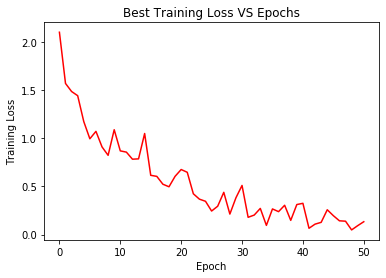

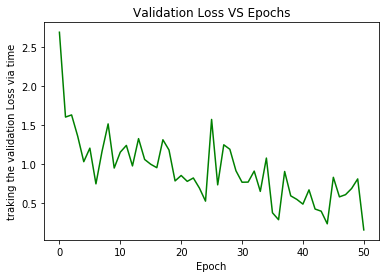

In [33]:
import matplotlib.pyplot as plt

plt.plot(CNN_Model.train_loss,'r-')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Best Training Loss VS Epochs')
plt.show()


plt.plot(CNN_Model.val_loss,'g-')
plt.xlabel('Epoch')
plt.ylabel('traking the validation Loss via time')
plt.title('Validation Loss VS Epochs')
plt.show()


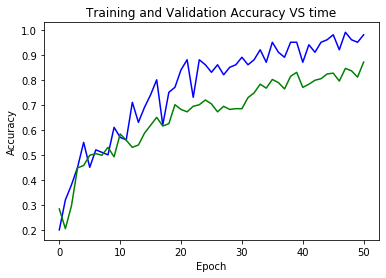

In [36]:
plt.plot(CNN_Model.all_train_acc, 'b-')
plt.plot(CNN_Model.all_val_acc, 'g-')
plt.title('Training and Validation Accuracy VS time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()